In [ ]:
!pip install yfinance
!pip install yahoofinancials
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Data fetching
import yfinance as yf
from yahoofinancials import YahooFinancials

#Data Management
import pandas as pd
import numpy as np

#Visualization 
import matplotlib.pyplot as plt
%matplotlib inline

#Statistic tools
import statsmodels.api as sm
from scipy import stats
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import norm, lognorm, skew, kurtosis
import pylab

#1.Download 4 financial securities 

เป็นการดึงข้อมูลมาจาก yahoo finance โดยเลือกมาทั้งหมด 4 tickers ได้เเก่ 'BANPU.BK', 'BTS.BK', 'TU.BK', 'PTTGC' โดยจะดึงข้อมูลตั้งเเต่ 2016-01-01 ถึง 2022-01-01

In [ ]:
tickers = ['BANPU.BK', 'BTS.BK', 'TU.BK']

In [ ]:
df = yf.download(tickers='PTTGC.BK', interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True)[['Close']].ffill()
df.columns = ['PTTGC']
df.head()

[*********************100%***********************]  1 of 1 completed


,PTTGC
Date,
2016-01-04,37.281483
2016-01-05,36.908672
2016-01-06,36.722271
2016-01-07,33.926155
2016-01-08,35.044598


In [ ]:
for ticker in tickers:
  pre_df = yf.download(tickers=ticker, interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True)[['Close']].ffill()
  pre_df.columns = [str(ticker.split('.')[0])]
  df = pd.merge(df, pre_df, left_index=True, right_index=True)

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PTTGC,BANPU,BTS,TU
Date,,,,
2016-01-04,37.281483,8.956746,6.508793,13.162559
2016-01-05,36.908672,8.900057,6.545774,13.006788
2016-01-06,36.722271,8.843369,6.508793,13.084671
2016-01-07,33.926155,8.446553,6.286901,13.084671
2016-01-08,35.044598,8.446553,6.323883,13.084671


# 2.Calculate returns, log returns, cumulative returns

## Returns

เป็นการคำนวณค่า return เเบบปกติโดยใช้สูตร

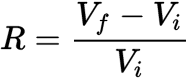

In [ ]:
for ticker in df.columns:
  df[str(ticker) + '_returns'] = df[ticker].pct_change(1)

df.head()

,PTTGC,BANPU,BTS,TU,PTTGC_returns,BANPU_returns,BTS_returns,TU_returns
Date,,,,,,,,
2016-01-04,37.281483,8.956746,6.508793,13.162559,NaN,NaN,NaN,NaN
2016-01-05,36.908672,8.900057,6.545774,13.006788,-0.010000,-0.006329,0.005682,-0.011834
2016-01-06,36.722271,8.843369,6.508793,13.084671,-0.005050,-0.006369,-0.005650,0.005988
2016-01-07,33.926155,8.446553,6.286901,13.084671,-0.076142,-0.044872,-0.034091,0.000000
2016-01-08,35.044598,8.446553,6.323883,13.084671,0.032967,0.000000,0.005882,0.000000


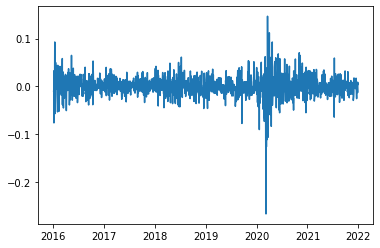

In [ ]:
plt.plot(df['PTTGC_returns'])

## Log returns

เป็นการคำนวณค่า return จากสูตร log จากสูตร

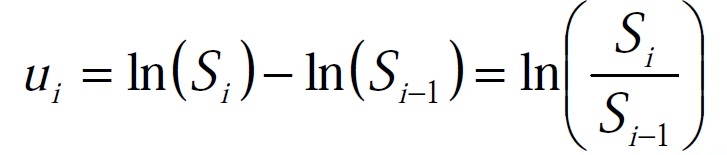

In [ ]:
for ticker in  df.columns[:4]:
  df[ticker + '_log_returns'] = np.log(df[ticker] / df[ticker].shift(1))

df.head()

,PTTGC,BANPU,BTS,TU,PTTGC_returns,BANPU_returns,BTS_returns,TU_returns,PTTGC_log_returns,BANPU_log_returns,BTS_log_returns,TU_log_returns
Date,,,,,,,,,,,,
2016-01-04,37.281483,8.956746,6.508793,13.162559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,36.908672,8.900057,6.545774,13.006788,-0.010000,-0.006329,0.005682,-0.011834,-0.010050,-0.006349,0.005666,-0.011905
2016-01-06,36.722271,8.843369,6.508793,13.084671,-0.005050,-0.006369,-0.005650,0.005988,-0.005063,-0.006390,-0.005666,0.005970
2016-01-07,33.926155,8.446553,6.286901,13.084671,-0.076142,-0.044872,-0.034091,0.000000,-0.079197,-0.045909,-0.034686,0.000000
2016-01-08,35.044598,8.446553,6.323883,13.084671,0.032967,0.000000,0.005882,0.000000,0.032435,0.000000,0.005865,0.000000


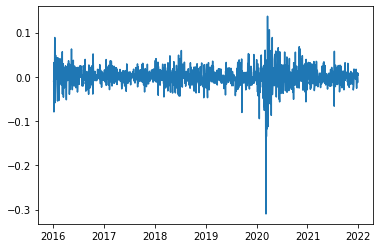

In [ ]:
plt.plot(df['PTTGC_log_returns'])

## Cumulative returns

เป็นการคำนวณค่า return จากค่า return เเบบปกติ เเต่จะต่างกันตรงที่คำนวณเเบบเป็นค่า return สะสม

In [ ]:
for ticker in  df.columns[:4]:
  df[ticker + '_cum_returns'] = (1+df[ticker + '_returns']).cumprod()

df.head()

,PTTGC,BANPU,BTS,TU,PTTGC_returns,BANPU_returns,BTS_returns,TU_returns,PTTGC_log_returns,BANPU_log_returns,BTS_log_returns,TU_log_returns,PTTGC_cum_returns,BANPU_cum_returns,BTS_cum_returns,TU_cum_returns
Date,,,,,,,,,,,,,,,,
2016-01-04,37.281483,8.956746,6.508793,13.162559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,36.908672,8.900057,6.545774,13.006788,-0.010000,-0.006329,0.005682,-0.011834,-0.010050,-0.006349,0.005666,-0.011905,0.990,0.993671,1.005682,0.988166
2016-01-06,36.722271,8.843369,6.508793,13.084671,-0.005050,-0.006369,-0.005650,0.005988,-0.005063,-0.006390,-0.005666,0.005970,0.985,0.987342,1.000000,0.994083
2016-01-07,33.926155,8.446553,6.286901,13.084671,-0.076142,-0.044872,-0.034091,0.000000,-0.079197,-0.045909,-0.034686,0.000000,0.910,0.943038,0.965909,0.994083
2016-01-08,35.044598,8.446553,6.323883,13.084671,0.032967,0.000000,0.005882,0.000000,0.032435,0.000000,0.005865,0.000000,0.940,0.943038,0.971591,0.994083


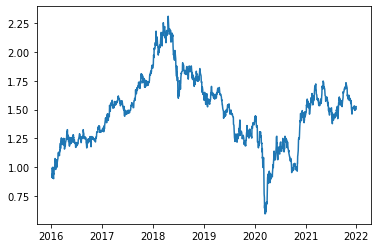

In [ ]:
plt.plot(df['PTTGC_cum_returns'])

# 3.Plot histogram, rolling volatility, and Quantile-Quantile

จากค่า skewness หรือค่าความเบ้ของกราฟ ปกติเเล้ว normal dist. จะมีค่า skewness เป็น 0 หรือว่ากราฟไม่มีความเบ้นั้่นเอง เเต่หากค่า skewness มีค่า <0 กราฟจะเบ้ซ้าย เเละหาก >0 กราฟจะเบ้ขวา ดังรูป

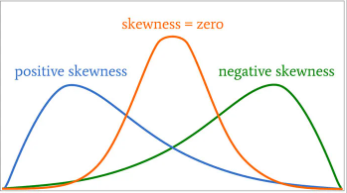

จากค่า kurtosis หรือค่าความโด่งของกราฟ ปกติเเล้ว normal dist. จะมีค่า kurtosis เป็น 3 ซึ่งจะมีความโด่งกลางๆ เเต่หากมีค่า <3 จะเรียกว่า playkurtic หรือกราฟที่โด่งต่ำกว่า normal dist และหากมีค่า >3 จะเรียกว่า leptokurtic หรือกราฟที่มีความโด่งสูงกว่า normal dist ดังรูป
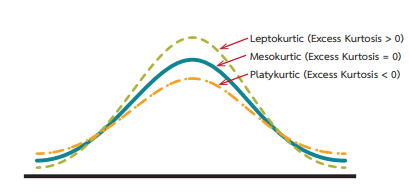


ส่วนการทำการทำ QQ plot เป็นการนำข้อมูลของเรามา fit กับ distribution ต่างๆ เพื่อดูว่ามีความคล้ายกับ distribution นั้นๆ หรือไม่โดยหากมีความเข้ากันกราฟที่ได้จะมีความเป็นเส้นตรง 45 องศา ดังรูป

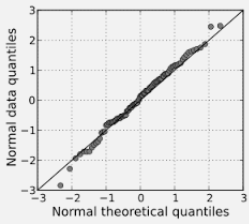

## Simple returns

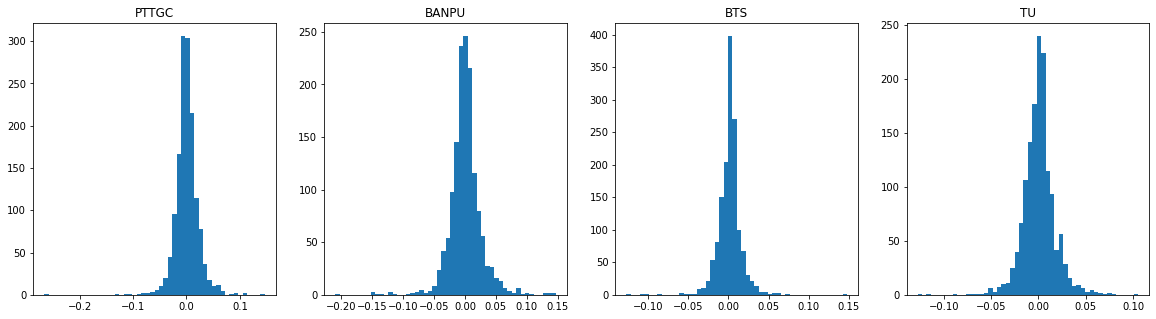

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
plt.hist(df['PTTGC_returns'], bins = 50)
plt.title('PTTGC')

plt.subplot(1,4,2)
plt.hist(df['BANPU_returns'], bins = 50)
plt.title('BANPU')

plt.subplot(1,4,3)
plt.hist(df['BTS_returns'], bins = 50)
plt.title('BTS')

plt.subplot(1,4,4)
plt.hist(df['TU_returns'], bins = 50)
plt.title('TU')

plt.show()

In [ ]:
for ticker in df.columns[4:8]:
  print(f'Skewness of {ticker} is {round(skew(df[ticker].dropna(), axis=0, bias=True), 2)} & Kurtosis is {round(kurtosis(df[ticker].dropna(), axis=0, bias=True),2)}')

Skewness of PTTGC_returns is -0.99 & Kurtosis is 18.56
Skewness of BANPU_returns is -0.23 & Kurtosis is 8.8
Skewness of BTS_returns is 0.02 & Kurtosis is 15.98
Skewness of TU_returns is -0.16 & Kurtosis is 6.02


ถัดมาเป็นการทำ rolling volatility เพื่อดูความผันผวนของ asset ตามช่วงเวลาต่างๆ โดยทำการเเบ่งเป็นช่วงละ 30 วัน ช่วงไหนที่มีความผันผวนสูงก็จะมีค่า volatility ที่สูง จะเห็นได้ดังกราฟ

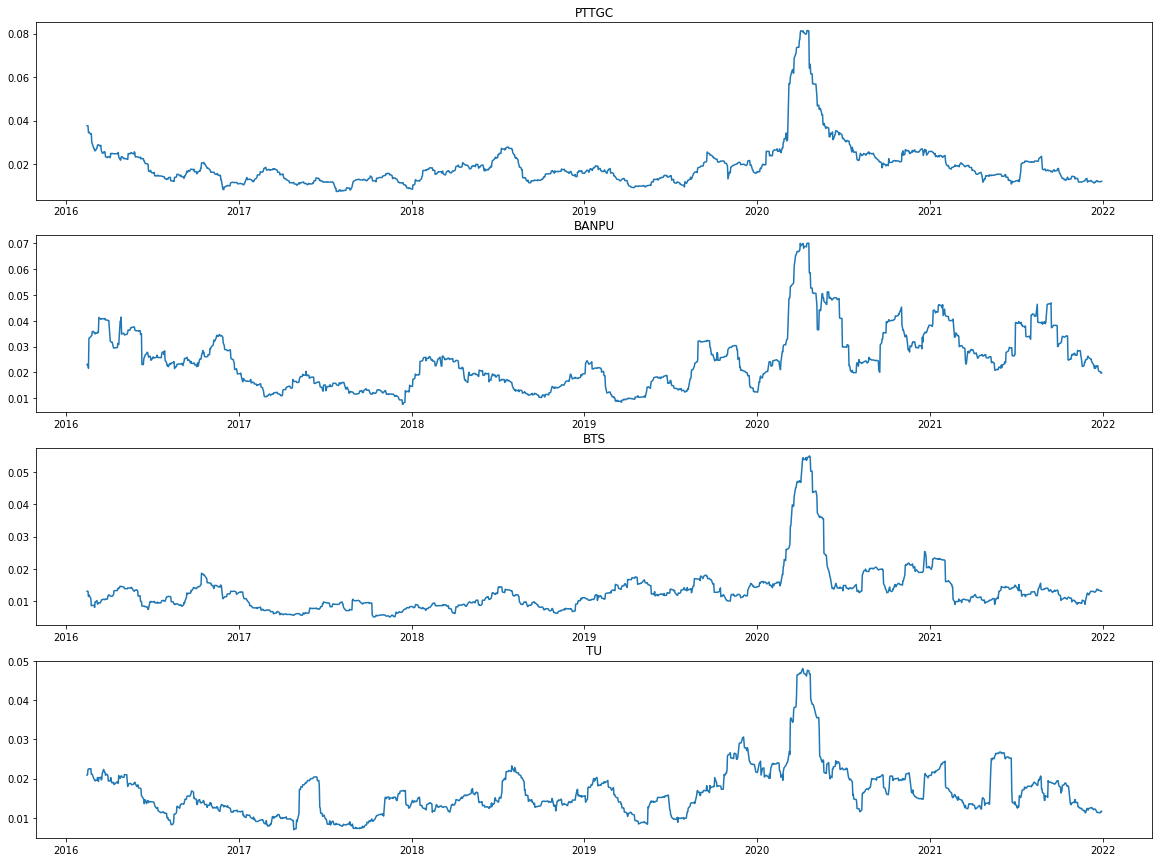

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(4,1,1)
plt.plot(df['PTTGC_returns'].rolling(window=30, min_periods=30).std())
plt.title('PTTGC')

plt.subplot(4,1,2)
plt.plot(df['BANPU_returns'].rolling(window=30, min_periods=30).std())
plt.title('BANPU')

plt.subplot(4,1,3)
plt.plot(df['BTS_returns'].rolling(window=30, min_periods=30).std())
plt.title('BTS')

plt.subplot(4,1,4)
plt.plot(df['TU_returns'].rolling(window=30, min_periods=30).std())
plt.title('TU')

plt.show()

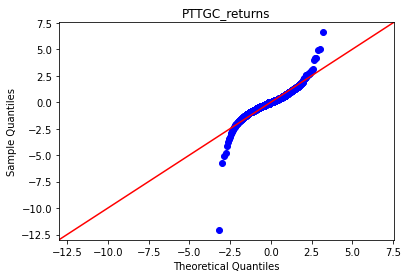

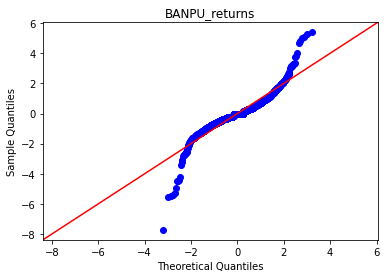

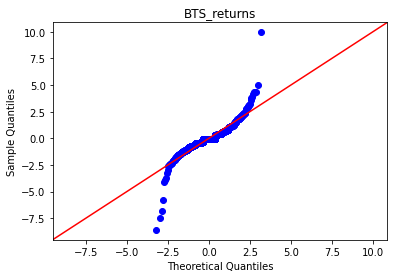

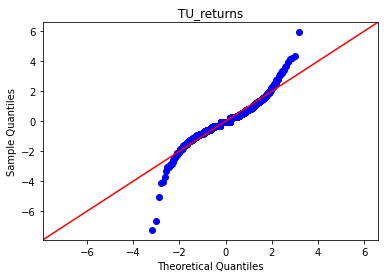

In [ ]:
for ret in df.columns[4:8]:
  sm.qqplot(df[ret].dropna(), norm, fit=True, line='45')
  plt.title(ret)

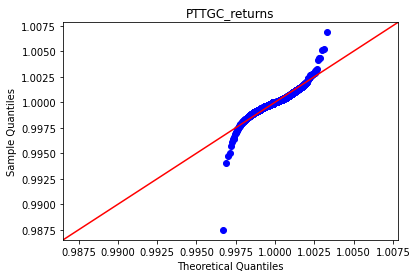

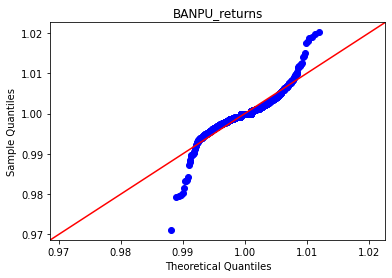

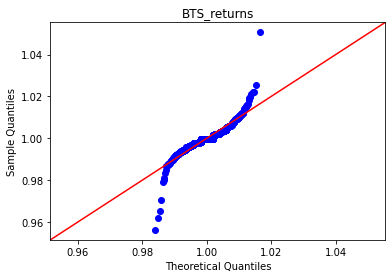

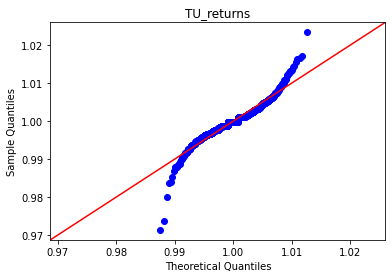

In [ ]:
for ret in df.columns[4:8]:
  sm.qqplot(df[ret].dropna(), lognorm, fit=True, line='45')
  plt.title(ret)

จะเห็นได้ว่าจากการทำ QQ plot ข้อมูลมีความเข้ากันกับทั้งสอง distribution เเละเมื่อลองทำการ นำมา fit กับ normal, lognormal dist. พรอ้มทั้งดูค่า SSE จะพบว่ามีความใกล้เคียงกันไม่ได้ต่างกันมากนัก ทั้ง 4 assets 

,sumsquare_error,aic,bic,kl_div
lognorm,349.474872,3123.699703,-2060.737065,inf
norm,353.615851,3076.465612,-2050.847380,inf


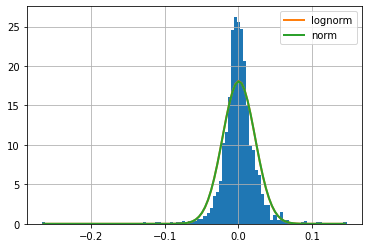

In [ ]:
f = Fitter(df['PTTGC_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,1645.541775,1063.170504,198.278357,inf
norm,1648.806014,1038.453010,193.882887,inf


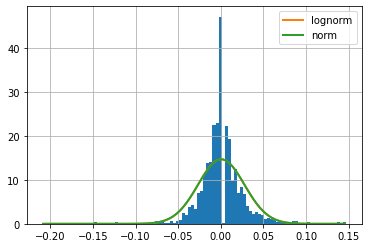

In [ ]:
f = Fitter(df['BANPU_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
norm,8581.443359,2259.271800,2598.927843,inf
lognorm,8581.872508,2236.179266,2606.285576,inf


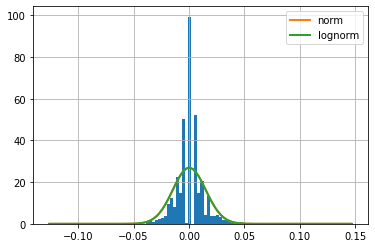

In [ ]:
f = Fitter(df['BTS_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,4983.714591,891.135906,1813.896669,inf
norm,4988.269792,873.359248,1807.943877,inf


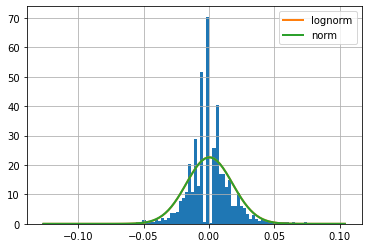

In [ ]:
f = Fitter(df['TU_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

## Log_returns

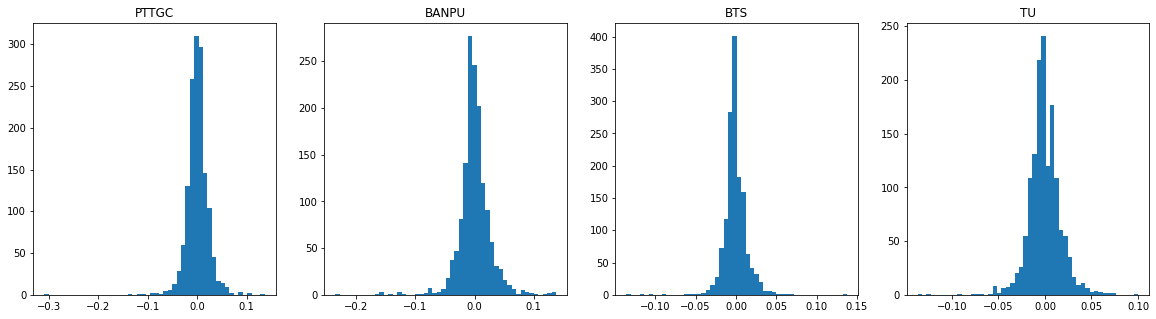

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
plt.hist(df['PTTGC_log_returns'], bins = 50)
plt.title('PTTGC')

plt.subplot(1,4,2)
plt.hist(df['BANPU_log_returns'], bins = 50)
plt.title('BANPU')

plt.subplot(1,4,3)
plt.hist(df['BTS_log_returns'], bins = 50)
plt.title('BTS')

plt.subplot(1,4,4)
plt.hist(df['TU_log_returns'], bins = 50)
plt.title('TU')

plt.show()

In [ ]:
for ticker in df.columns[8:12]:
  print(f'Skewness of {ticker} is {round(skew(df[ticker].dropna(), axis=0, bias=True), 2)} & Kurtosis is {round(kurtosis(df[ticker].dropna(), axis=0, bias=True),2)}')

Skewness of PTTGC_log_returns is -1.78 & Kurtosis is 28.36
Skewness of BANPU_log_returns is -0.7 & Kurtosis is 10.38
Skewness of BTS_log_returns is -0.38 & Kurtosis is 16.25
Skewness of TU_log_returns is -0.38 & Kurtosis is 6.73


ถัดมาเป็นการทำ rolling volatility เพื่อดูความผันผวนของ asset ตามช่วงเวลาต่างๆ โดยทำการเเบ่งเป็นช่วงละ 30 วัน ช่วงไหนที่มีความผันผวนสูงก็จะมีค่า volatility ที่สูง จะเห็นได้ดังกราฟ

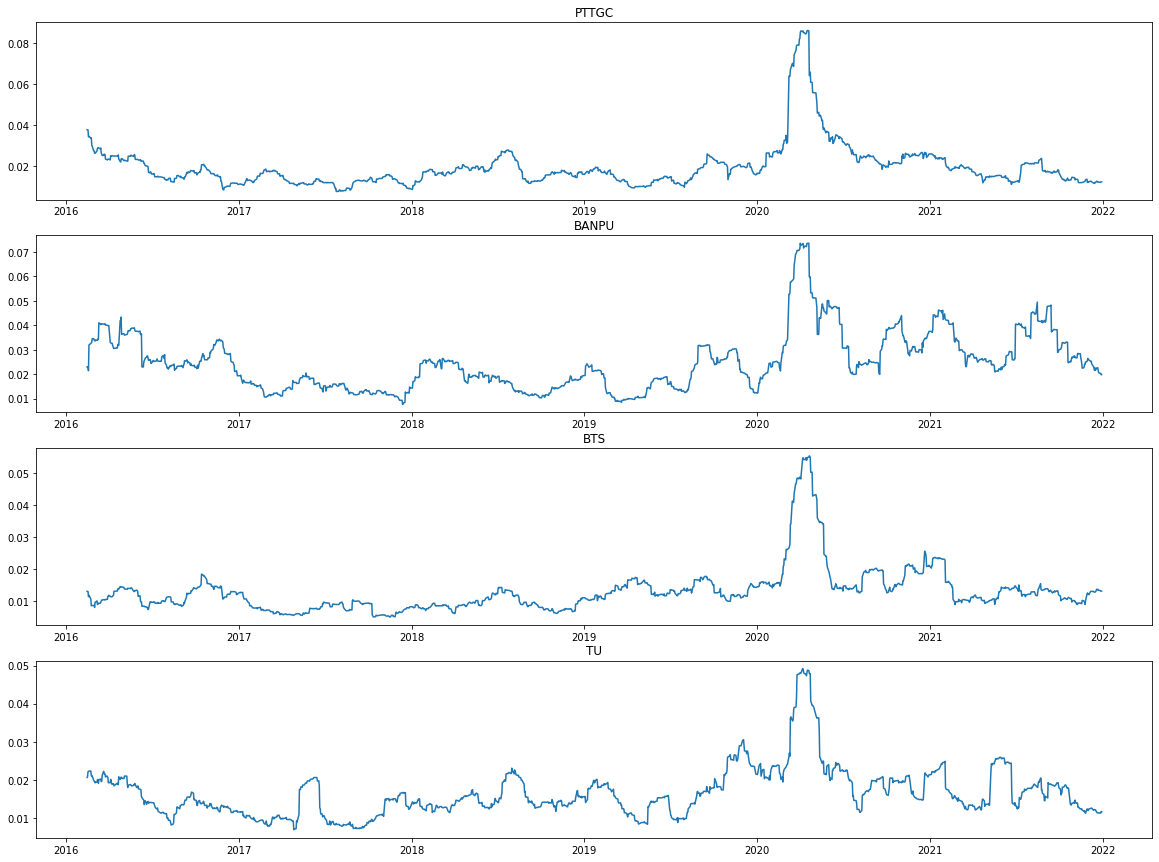

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(4,1,1)
plt.plot(df['PTTGC_log_returns'].rolling(window=30, min_periods=30).std())
plt.title('PTTGC')

plt.subplot(4,1,2)
plt.plot(df['BANPU_log_returns'].rolling(window=30, min_periods=30).std())
plt.title('BANPU')

plt.subplot(4,1,3)
plt.plot(df['BTS_log_returns'].rolling(window=30, min_periods=30).std())
plt.title('BTS')

plt.subplot(4,1,4)
plt.plot(df['TU_log_returns'].rolling(window=30, min_periods=30).std())
plt.title('TU')

plt.show()

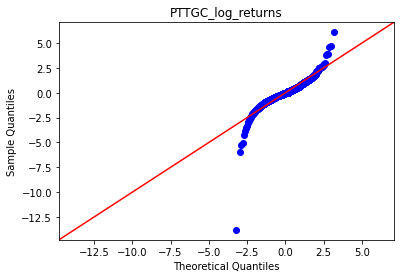

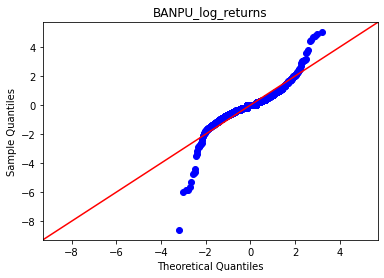

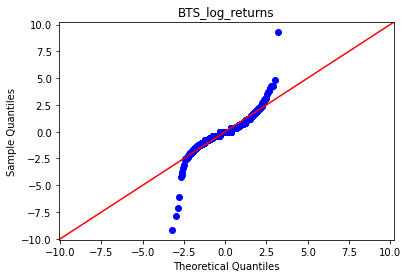

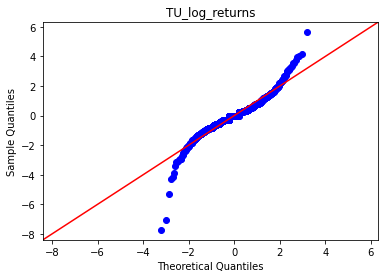

In [ ]:
for ret in df.columns[8:12]:
  sm.qqplot(df[ret].dropna(), norm, fit=True, line='45')
  plt.title(ret)

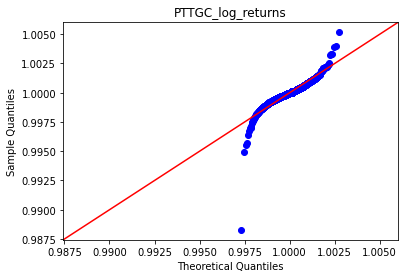

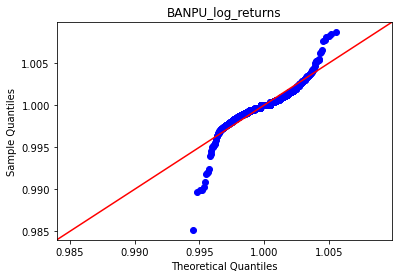

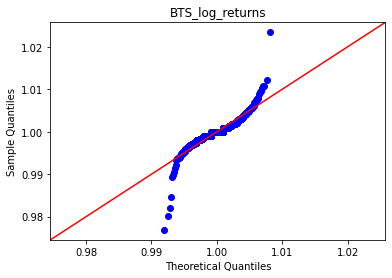

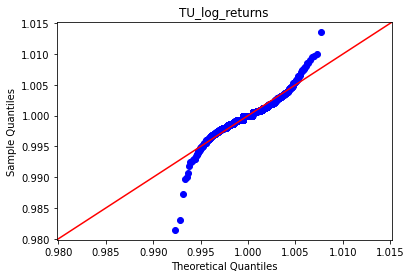

In [ ]:
for ret in df.columns[8:12]:
  sm.qqplot(df[ret].dropna(), lognorm, fit=True, line='45')
  plt.title(ret)

จะเห็นได้ว่าจากการทำ QQ plot ข้อมูลมีความเข้ากันกับทั้งสอง distribution เเละเมื่อลองทำการ นำมา fit กับ normal, lognormal dist. พรอ้มทั้งดูค่า SSE จะพบว่ามีความใกล้เคียงกันไม่ได้ต่างกันมากนัก ทั้ง 4 assets 

,sumsquare_error,aic,bic,kl_div
norm,323.568973,4208.043660,-2180.316117,inf
lognorm,327.397681,4216.519353,-2155.880429,inf


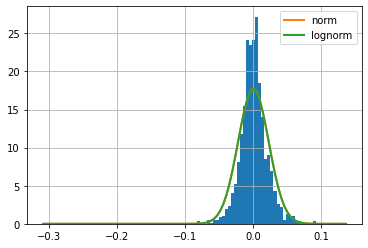

In [ ]:
f = Fitter(df['PTTGC_log_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,1621.399969,1350.779376,176.729523,inf
norm,1622.483998,1334.147632,170.419160,inf


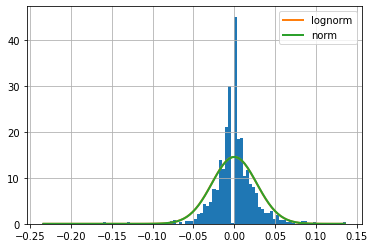

In [ ]:
f = Fitter(df['BANPU_log_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,8691.205992,2179.717849,2624.743241,inf
norm,8691.636452,2181.647931,2617.530630,inf


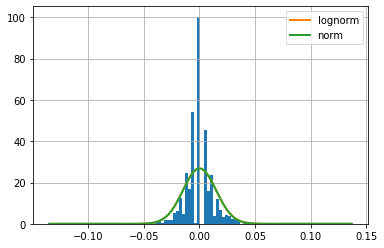

In [ ]:
f = Fitter(df['BTS_log_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
norm,4518.162976,979.989669,1663.625752,inf
lognorm,4519.488629,992.015490,1671.338296,inf


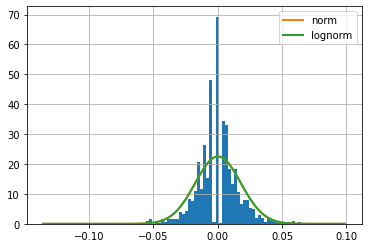

In [ ]:
f = Fitter(df['TU_log_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

จากการ fit distribution จะเห็นได้ว่า normal เเละ lognormal ไม่ได้มีควมเเตกต่างกันมากนัก ในเเต่ละกราฟ 

## Cumulative returns

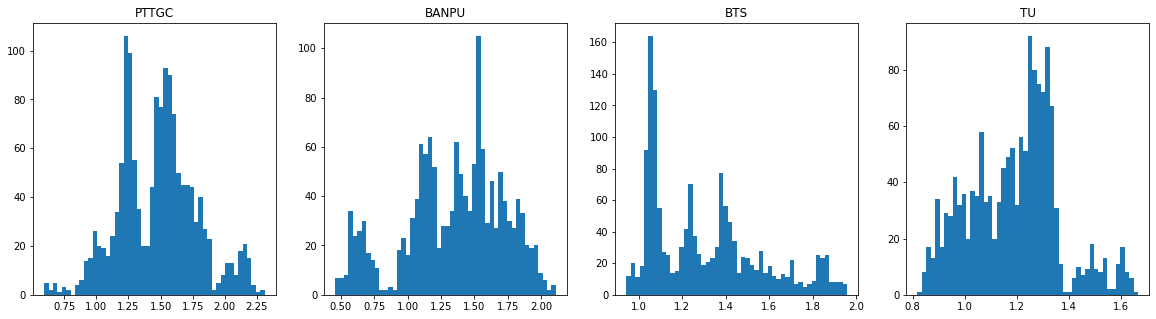

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
plt.hist(df['PTTGC_cum_returns'], bins = 50)
plt.title('PTTGC')

plt.subplot(1,4,2)
plt.hist(df['BANPU_cum_returns'], bins = 50)
plt.title('BANPU')

plt.subplot(1,4,3)
plt.hist(df['BTS_cum_returns'], bins = 50)
plt.title('BTS')

plt.subplot(1,4,4)
plt.hist(df['TU_cum_returns'], bins = 50)
plt.title('TU')

plt.show()

In [ ]:
for ticker in df.columns[12:16]:
  print(f'Skewness of {ticker} is {round(skew(df[ticker].dropna(), axis=0, bias=True), 2)} & Kurtosis is {round(kurtosis(df[ticker].dropna(), axis=0, bias=True),2)}')

Skewness of PTTGC_cum_returns is 0.14 & Kurtosis is 0.04
Skewness of BANPU_cum_returns is -0.43 & Kurtosis is -0.49
Skewness of BTS_cum_returns is 0.74 & Kurtosis is -0.43
Skewness of TU_cum_returns is 0.14 & Kurtosis is -0.21


ถัดมาเป็นการทำ rolling volatility เพื่อดูความผันผวนของ asset ตามช่วงเวลาต่างๆ โดยทำการเเบ่งเป็นช่วงละ 30 วัน ช่วงไหนที่มีความผันผวนสูงก็จะมีค่า volatility ที่สูง จะเห็นได้ดังกราฟ

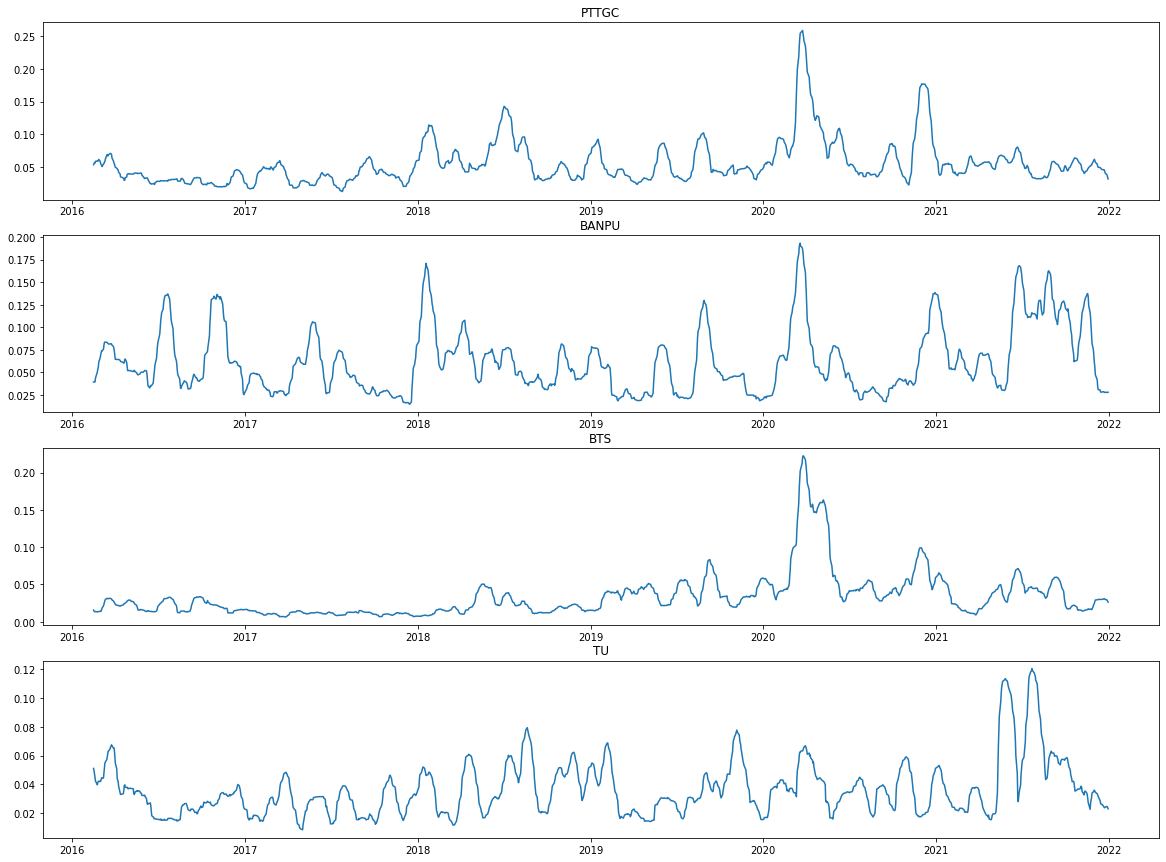

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(4,1,1)
plt.plot(df['PTTGC_cum_returns'].rolling(window=30, min_periods=30).std())
plt.title('PTTGC')

plt.subplot(4,1,2)
plt.plot(df['BANPU_cum_returns'].rolling(window=30, min_periods=30).std())
plt.title('BANPU')

plt.subplot(4,1,3)
plt.plot(df['BTS_cum_returns'].rolling(window=30, min_periods=30).std())
plt.title('BTS')

plt.subplot(4,1,4)
plt.plot(df['TU_cum_returns'].rolling(window=30, min_periods=30).std())
plt.title('TU')

plt.show()

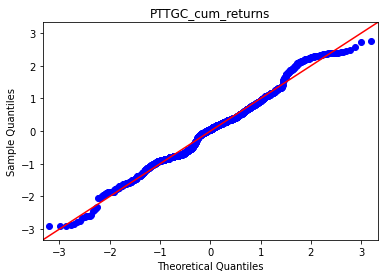

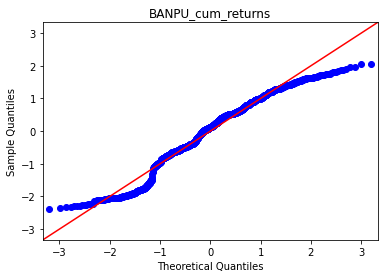

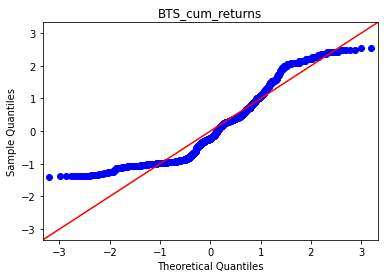

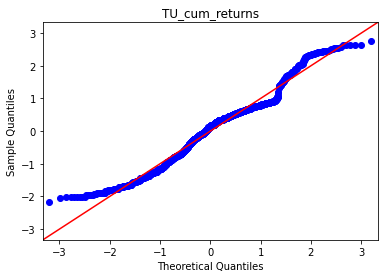

In [ ]:
for ret in df.columns[12:16]:
  sm.qqplot(df[ret].dropna(), norm, fit=True, line='45')
  plt.title(ret)

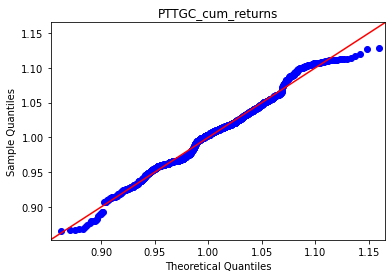

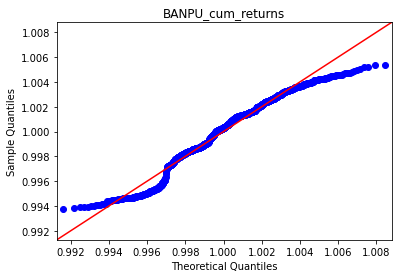

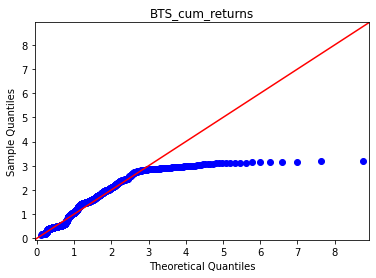

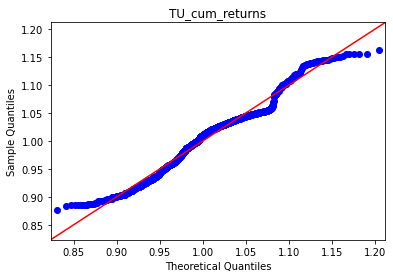

In [ ]:
for ret in df.columns[12:16]:
  sm.qqplot(df[ret].dropna(), lognorm, fit=True, line='45')
  plt.title(ret)

สำหรับการทำ QQ plot ของ cumulative return ของ BTS.BK จะเห็นได้่ชัดเจนจากกราฟ เเละ SSE ว่าไม่มีความเข้ากับ lognormal dist เนื่องจากกราฟไม่มีความเป็นเส้นตรงเมื่อทำการ QQ plot กับ lognormal dist

,sumsquare_error,aic,bic,kl_div
lognorm,13.654668,223.647683,-6788.083636,inf
norm,13.703014,217.668302,-6790.215347,inf


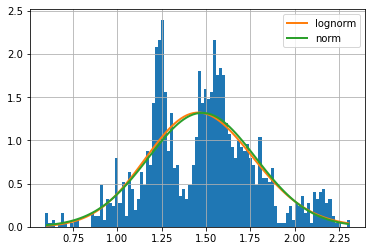

In [ ]:
f = Fitter(df['PTTGC_cum_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
norm,13.487980,155.999124,-6813.276372,inf
lognorm,13.521051,157.544147,-6802.421159,inf


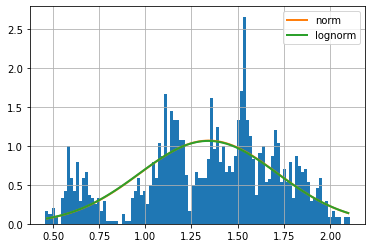

In [ ]:
f = Fitter(df['BANPU_cum_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,84.762676,88.371635,-4126.105400,inf
norm,106.293731,76.585670,-3803.370454,inf


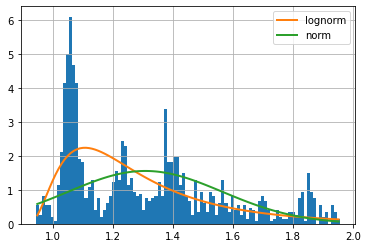

In [ ]:
f = Fitter(df['BTS_cum_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
norm,56.949314,46.381142,-4713.227569,inf
lognorm,59.283160,44.547691,-4647.384159,inf


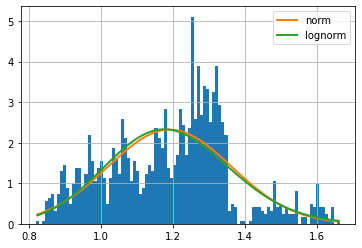

In [ ]:
f = Fitter(df['TU_cum_returns'].dropna(), distributions=["norm", "lognorm"])
f.fit()
f.summary()

จากกราฟทำการ fit distribution เข้ากับ normal เเละ lognormal dist จะเห็นได้ว่า BTS.BK ไม่มีความเข้ากับ lognormal ซึ่งเป็นการยืนยันจากการทำ QQ plot ก่อนหน้านี้

# 4.Plot the correlation matrix of these securities

ค่า correlation เป็นค่าที่บ่งบอกความสัมพันธ์ของข้อมูล ซึ่งหากมีค่าเข้าใกล้ 1 เเสดงว่ามีความสัมพันธ์ไปในทางทิศทางบวก หรือค่าหนึ่งเพิ่มอีกค่าหนึ่งก็จะเพิ่มขึ้นเช่นกัน เเต่ถ้าเข้าใกล้ -1 จะมีความสัมพันธ์ไปในทิศทางลบ หรือค่าหนึ่งลดอีกค่าหนึ่งก็๋จะเพิ่ม เเต่หากไม่มีความสัมพันธ์กันเลยจะมีค่าเข้าใกล้ 0 ซึ่งค่า correlation สามารถคำนวณได้จากสูตร ดังนี้

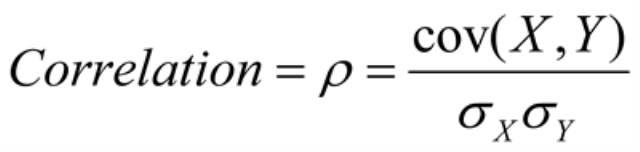

In [ ]:
multi_stocks = yf.download("^SET.BK PTTGC.BK BANPU.BK BTS.BK TU.BK", interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True)['Close'].ffill()
multi_stocks.head()

[*********************100%***********************]  5 of 5 completed


,BANPU.BK,BTS.BK,PTTGC.BK,TU.BK,^SET.BK
Date,,,,,
2016-01-04,8.956745,6.508791,37.281483,13.162557,1263.410034
2016-01-05,8.900057,6.545774,36.908676,13.006787,1253.339966
2016-01-06,8.843368,6.508791,36.722267,13.084672,1260.040039
2016-01-07,8.446550,6.286901,33.926155,13.084672,1224.829956
2016-01-08,8.446550,6.323884,35.044598,13.084672,1244.180054


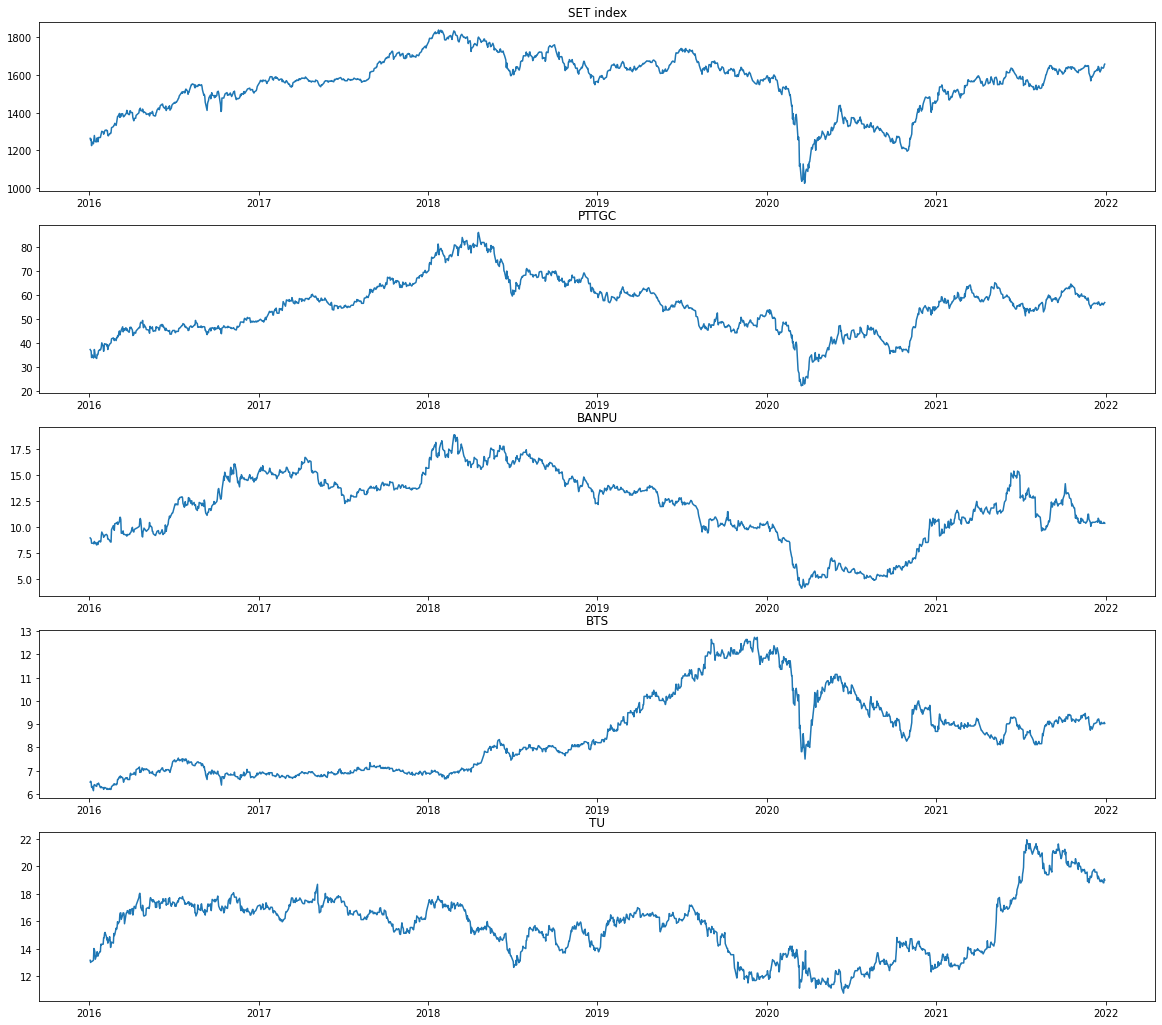

In [ ]:
plt.figure(figsize=(20, 18))

plt.subplot(5,1,1)
plt.plot(multi_stocks['^SET.BK'])
plt.title('SET index')

plt.subplot(5,1,2)
plt.plot(multi_stocks['PTTGC.BK'])
plt.title('PTTGC')

plt.subplot(5,1,3)
plt.plot(multi_stocks['BANPU.BK'])
plt.title('BANPU')

plt.subplot(5,1,4)
plt.plot(multi_stocks['BTS.BK'])
plt.title('BTS')

plt.subplot(5,1,5)
plt.plot(multi_stocks['TU.BK'])
plt.title('TU')

plt.show()

จากกราฟจะสังเกตได้ว่าหุ้นเเต่ละตัวมีความสัมพันธ์ที่ค่อนข้างไปในทิศทางเดียวกันยกเว้น BTS ที่มีความเเกต่างจากหุ้นตัวอื่นๆ เเละ SET.BK

In [ ]:
#คำนวณค่า Returns
multi_stock_daily_returns = multi_stocks.pct_change(1)
multi_stock_daily_returns.head()

,BANPU.BK,BTS.BK,PTTGC.BK,TU.BK,^SET.BK
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.006329,0.005682,-0.010000,-0.011834,-0.007971
2016-01-06,-0.006370,-0.005650,-0.005051,0.005988,0.005346
2016-01-07,-0.044872,-0.034091,-0.076142,0.000000,-0.027944
2016-01-08,0.000000,0.005882,0.032967,0.000000,0.015798


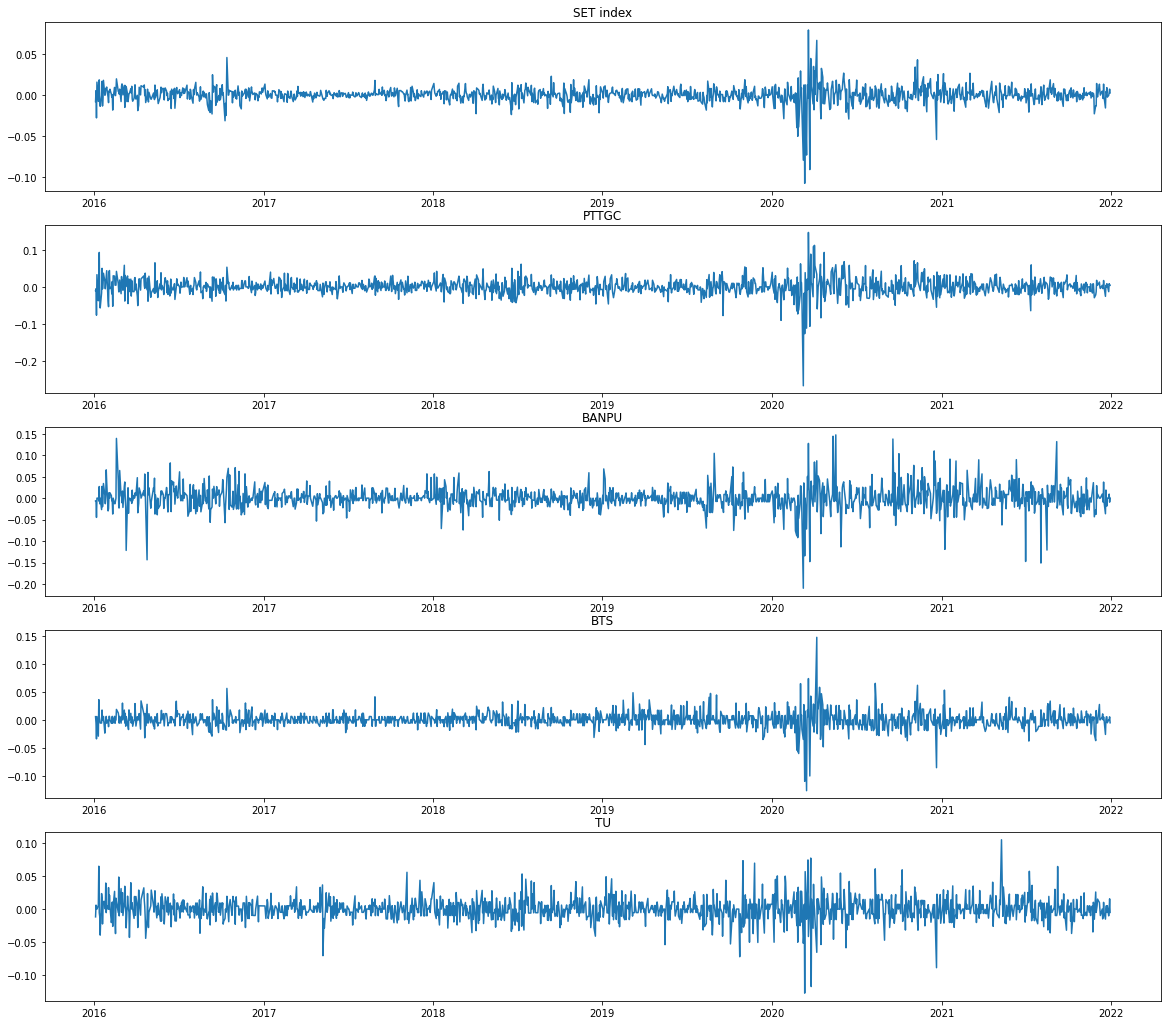

In [ ]:
plt.figure(figsize=(20, 18))

plt.subplot(5,1,1)
plt.plot(multi_stock_daily_returns['^SET.BK'])
plt.title('SET index')

plt.subplot(5,1,2)
plt.plot(multi_stock_daily_returns['PTTGC.BK'])
plt.title('PTTGC')

plt.subplot(5,1,3)
plt.plot(multi_stock_daily_returns['BANPU.BK'])
plt.title('BANPU')

plt.subplot(5,1,4)
plt.plot(multi_stock_daily_returns['BTS.BK'])
plt.title('BTS')

plt.subplot(5,1,5)
plt.plot(multi_stock_daily_returns['TU.BK'])
plt.title('TU')

plt.show()

จากกราฟจะเห็นได้ว่าค่า return ก็ดูมีความสัมพันธ์ที่เป็นไปในทางเดียวกันเมื่อเทียบกับหุ้นเเต่ละตัว

In [ ]:
multi_stocks.corr()

,BANPU.BK,BTS.BK,PTTGC.BK,TU.BK,^SET.BK
BANPU.BK,1.000000,-0.476780,0.803116,0.472919,0.814306
BTS.BK,-0.476780,1.000000,-0.254076,-0.414994,-0.028955
PTTGC.BK,0.803116,-0.254076,1.000000,0.307581,0.877290
TU.BK,0.472919,-0.414994,0.307581,1.000000,0.386317
^SET.BK,0.814306,-0.028955,0.877290,0.386317,1.000000


จากการดูค่า correlation ของ price จะเห็นได้ว่า BTS.BK เเทบจะไม่มีความสัมพันธ์กับ SET.BK เลยเนื่องจากมีค่า corr เพียง -0.03 

In [ ]:
multi_stock_daily_returns.corr()

,BANPU.BK,BTS.BK,PTTGC.BK,TU.BK,^SET.BK
BANPU.BK,1.000000,0.254347,0.400499,0.136177,0.488021
BTS.BK,0.254347,1.000000,0.376096,0.160128,0.650041
PTTGC.BK,0.400499,0.376096,1.000000,0.215269,0.699679
TU.BK,0.136177,0.160128,0.215269,1.000000,0.315847
^SET.BK,0.488021,0.650041,0.699679,0.315847,1.000000


จากการดูค่า correlation ของ returns จะเห็นได้ว่า TU.BK มีความสัมพันธ์กับหุ้น เเละ SET.BK น้อยมากที่สุด โดยอาจะสังเกตได้จากกราฟที่ TU.BK มีความผันผวนมากกว่าตัวอื่นๆ 

In [ ]:
rolling_corr_PTTGC_BANPU_ret = multi_stock_daily_returns['PTTGC.BK'].rolling(200).corr(multi_stock_daily_returns['BANPU.BK']).dropna()
rolling_corr_PTTGC_BTS_ret = multi_stock_daily_returns['PTTGC.BK'].rolling(200).corr(multi_stock_daily_returns['BTS.BK']).dropna()
rolling_corr_PTTGC_TU_ret = multi_stock_daily_returns['PTTGC.BK'].rolling(200).corr(multi_stock_daily_returns['TU.BK']).dropna()
data={'PTTGC_BANPU':rolling_corr_PTTGC_BANPU_ret,'PTTGC_BTS':rolling_corr_PTTGC_BTS_ret,'PTTGC_TU':rolling_corr_PTTGC_TU_ret}
rolling_corr_PTTCG_ret=pd.DataFrame(data)
rolling_corr_PTTCG_ret.head()

,PTTGC_BANPU,PTTGC_BTS,PTTGC_TU
Date,,,
2016-10-28,0.213485,0.447046,0.215232
2016-10-31,0.212917,0.448635,0.213417
2016-11-01,0.206945,0.448259,0.214497
2016-11-02,0.184700,0.420188,0.218101
2016-11-03,0.185749,0.418769,0.219922


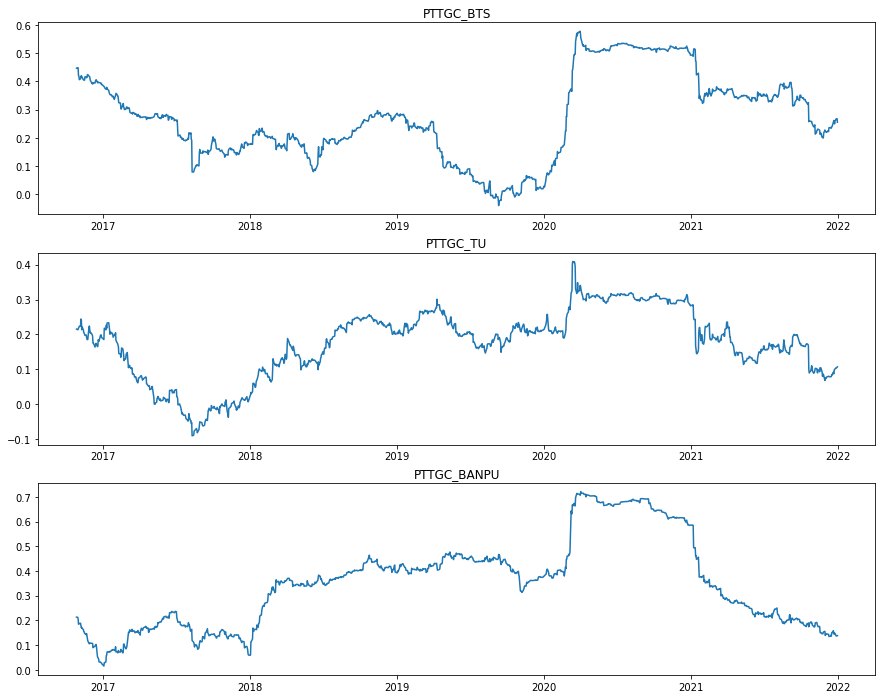

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(3,1,1)
plt.plot(rolling_corr_PTTCG_ret['PTTGC_BTS'])
plt.title('PTTGC_BTS')

plt.subplot(3,1,2)
plt.plot(rolling_corr_PTTCG_ret['PTTGC_TU'])
plt.title('PTTGC_TU')

plt.subplot(3,1,3)
plt.plot(rolling_corr_PTTCG_ret['PTTGC_BANPU'])
plt.title('PTTGC_BANPU')

plt.show()

จากกราฟเปรียบเทียบ corr ตามช่วงเวลาของ PTTGC.BK กับหุ้นตัวอื่นๆ จะพบว่ามีรูปร่างของกราฟที่คล้ายคลึงกัน เเต่กราฟ PTTGC_TU จะมีความเเตกต่างจากกราฟอื่นเล็กน้อย ซึ่งอาจจะทำให้พอ assume ได้ว่าราคาหุ้นมีความขึ้นต่อกัน โดยอาจจะเพราะว่าเป็นช่วงเศรษฐกิจของไทยที่ขึ้นลงเพราะวิกฤต COVID-19 จึงอาจตั้งสมมติฐานได้่ว่าหุ้นไทยส่วนใหญ่มีเเนวโน้มที่จะเป็นไปตามตลาดเศรษฐกิจไทย

# 5.Try to analyze range-based volatility and compared with rolling volatility

การทำ rolling volatility สามารถทำได้โดยการกำหนดช่วงเเละคำนวณค่า std ของ returns หรือ volatility ส่วนการทำ range-based volatility สามารถคำนวณได้จากค่า high, low, open, close เเละจำนวนวันตามสุตรดังนี้

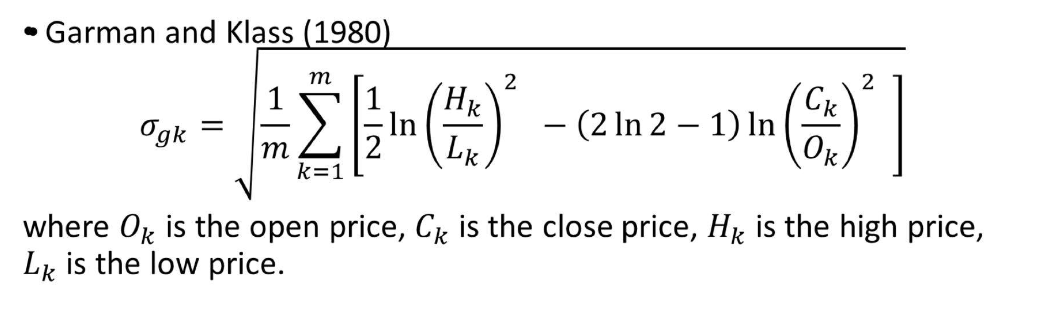

## PTTGC

In [ ]:
multi_stocks = yf.download("PTTGC.BK", interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True).ffill()
multi_stocks['returns'] = multi_stocks['Close'].pct_change()
multi_stocks['rolling_vol'] = multi_stocks['returns'].rolling(window=30, min_periods=30).std()
multi_stocks['range_based_Vol'] = (0.5*(np.log((multi_stocks['High'] / multi_stocks['Low'])))**2 - (2*np.log(2)-1) * (np.log(multi_stocks['Close'] / multi_stocks['Open']))**2) 
multi_stocks['rolling_RBV'] = multi_stocks['range_based_Vol'].rolling(window=30, min_periods=30).sum()
multi_stocks['rolling_RBV'] = multi_stocks['rolling_RBV'] / 30
multi_stocks['rolling_RBV'] = np.sqrt(multi_stocks['rolling_RBV'])
multi_stocks

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,returns,rolling_vol,range_based_Vol,rolling_RBV
Date,,,,,,,,,
2016-01-04,37.281494,38.027124,37.095087,37.281494,5403400,NaN,NaN,0.000308,NaN
2016-01-05,37.095084,37.840713,36.908676,36.908676,9440200,-0.010000,NaN,0.000301,NaN
2016-01-06,36.349456,36.908678,36.163049,36.722271,9000100,-0.005050,NaN,0.000168,NaN
2016-01-07,34.858196,35.231011,33.739751,33.926159,22173900,-0.076142,NaN,0.000652,NaN
2016-01-08,34.485375,35.231005,34.298968,35.044598,13794600,0.032967,NaN,0.000259,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-24,56.396592,56.880683,56.154547,56.638638,5260800,0.004292,0.011892,0.000075,0.013007
2021-12-27,56.638639,56.880684,55.912502,55.912502,5390000,-0.012820,0.011778,0.000083,0.012924
2021-12-28,56.396591,56.638637,56.154546,56.396591,9776100,0.008658,0.011934,0.000037,0.012929


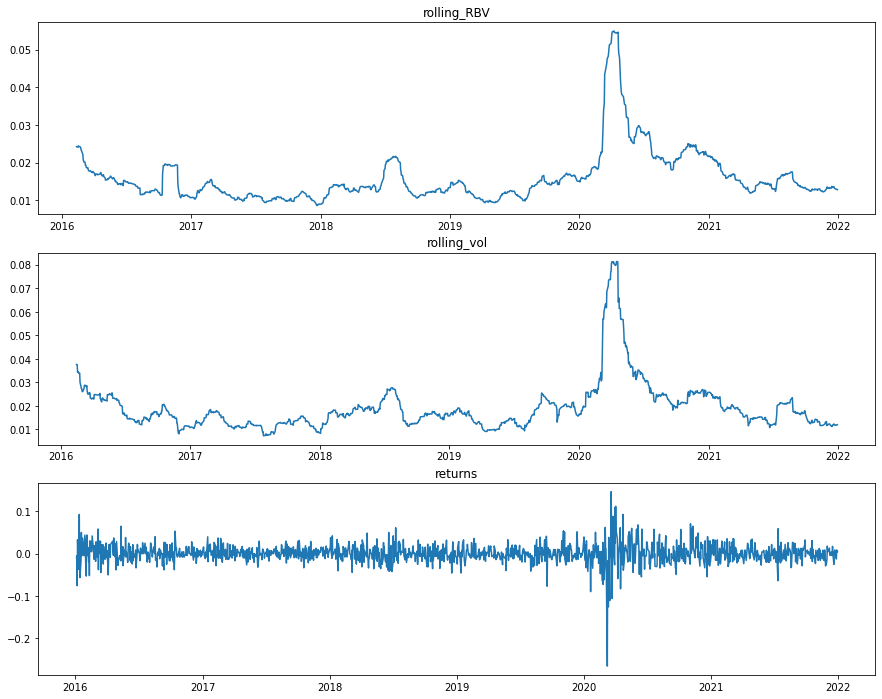

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(3,1,1)
plt.plot(multi_stocks['rolling_RBV'])
plt.title('rolling_RBV')

plt.subplot(3,1,2)
plt.plot(multi_stocks['rolling_vol'])
plt.title('rolling_vol')

plt.subplot(3,1,3)
plt.plot(multi_stocks['returns'])
plt.title('returns')

plt.show()

จากกราฟการเปรียบเทียบระหว่าง rolling volatility เเละ range-based volatility ของ PTTGC.BK จะเห็นว่าค่ามีความใกล้เคียงกัน โดยวิธี range-based volatility จะมีความสูงกว่าเล็กน้อย

## BANPU

In [ ]:
multi_stocks = yf.download("BANPU.BK", interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True).ffill()
multi_stocks['returns'] = multi_stocks['Close'].pct_change()
multi_stocks['rolling_vol'] = multi_stocks['returns'].rolling(window=30, min_periods=30).std()
multi_stocks['range_based_Vol'] = (0.5*(np.log((multi_stocks['High'] / multi_stocks['Low'])))**2 - (2*np.log(2)-1) * (np.log(multi_stocks['Close'] / multi_stocks['Open']))**2) 
multi_stocks['rolling_RBV'] = multi_stocks['range_based_Vol'].rolling(window=30, min_periods=30).sum()
multi_stocks['rolling_RBV'] = multi_stocks['rolling_RBV'] / 30
multi_stocks['rolling_RBV'] = np.sqrt(multi_stocks['rolling_RBV'])
multi_stocks

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,returns,rolling_vol,range_based_Vol,rolling_RBV
Date,,,,,,,,,
2016-01-04,9.070123,9.126811,8.956746,8.956746,4638173,NaN,NaN,0.000116,NaN
2016-01-05,8.956746,9.070123,8.786681,8.900058,11277222,-0.006329,NaN,0.000488,NaN
2016-01-06,8.900058,8.956746,8.729993,8.843369,9273433,-0.006369,NaN,0.000313,NaN
2016-01-07,8.729993,8.729993,8.276487,8.446552,20412171,-0.044872,NaN,0.001002,NaN
2016-01-08,8.446552,8.446552,8.219798,8.446552,12608713,0.000000,NaN,0.000370,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-24,10.365487,10.561062,10.365487,10.365487,30652200,0.000000,0.020542,0.000175,0.019583
2021-12-27,10.365487,10.463274,10.267699,10.365487,15579500,0.000000,0.020229,0.000178,0.019525
2021-12-28,10.463274,10.463274,10.267699,10.463274,24367700,0.009434,0.020319,0.000178,0.019563


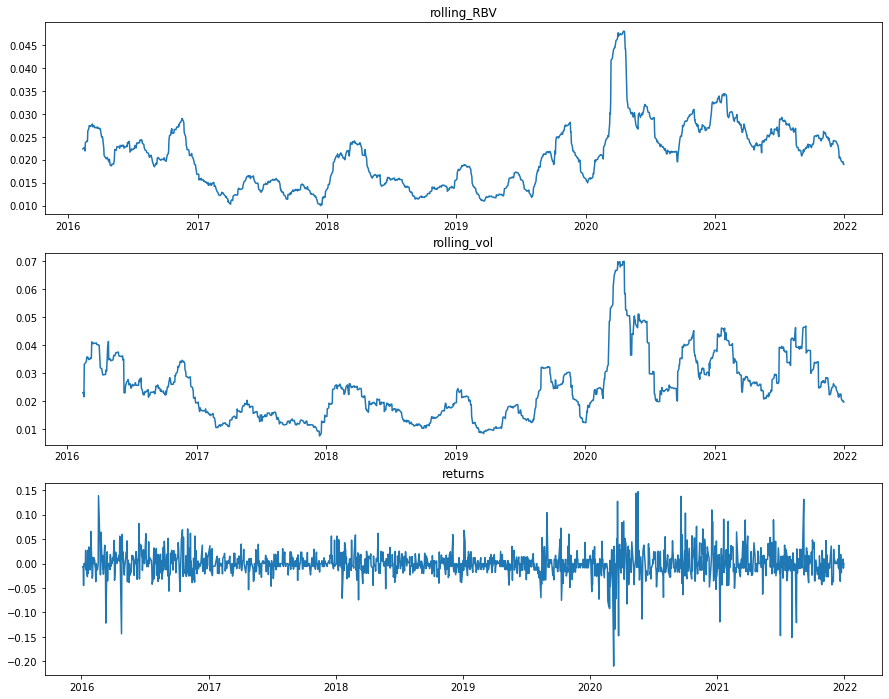

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(3,1,1)
plt.plot(multi_stocks['rolling_RBV'])
plt.title('rolling_RBV')

plt.subplot(3,1,2)
plt.plot(multi_stocks['rolling_vol'])
plt.title('rolling_vol')

plt.subplot(3,1,3)
plt.plot(multi_stocks['returns'])
plt.title('returns')

plt.show()

จากกราฟการเปรียบเทียบระหว่าง rolling volatility เเละ range-based volatility ของ ฺBANPU.BK จะเห็นว่าค่ามีความใกล้เคียงกัน โดยวิธี range-based volatility จะมีความต่ำกว่าเล็กน้อย

## BTS

In [ ]:
multi_stocks = yf.download("BTS.BK", interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True).ffill()
multi_stocks['returns'] = multi_stocks['Close'].pct_change()
multi_stocks['rolling_vol'] = multi_stocks['returns'].rolling(window=30, min_periods=30).std()
multi_stocks['range_based_Vol'] = (0.5*(np.log((multi_stocks['High'] / multi_stocks['Low'])))**2 - (2*np.log(2)-1) * (np.log(multi_stocks['Close'] / multi_stocks['Open']))**2) 
multi_stocks['rolling_RBV'] = multi_stocks['range_based_Vol'].rolling(window=30, min_periods=30).sum()
multi_stocks['rolling_RBV'] = multi_stocks['rolling_RBV'] / 30
multi_stocks['rolling_RBV'] = np.sqrt(multi_stocks['rolling_RBV'])
multi_stocks

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,returns,rolling_vol,range_based_Vol,rolling_RBV
Date,,,,,,,,,
2016-01-04,6.693701,6.693701,6.508792,6.508792,29383400,NaN,NaN,0.000089,NaN
2016-01-05,6.545774,6.656720,6.545774,6.545774,36570900,0.005682,NaN,0.000141,NaN
2016-01-06,6.582756,6.582756,6.508792,6.508792,15777400,-0.005650,NaN,0.000015,NaN
2016-01-07,6.508793,6.545775,6.286902,6.286902,54940200,-0.034091,NaN,0.000349,NaN
2016-01-08,6.323883,6.397846,6.286901,6.323883,22423600,0.005882,NaN,0.000153,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-24,9.127390,9.127390,9.030805,9.030805,9019500,-0.005319,0.013297,0.000013,0.012117
2021-12-27,9.079097,9.127390,8.982511,9.030805,21328500,0.000000,0.013184,0.000117,0.012168
2021-12-28,9.030805,9.079097,8.982511,9.030805,15896800,0.000000,0.013015,0.000057,0.012138


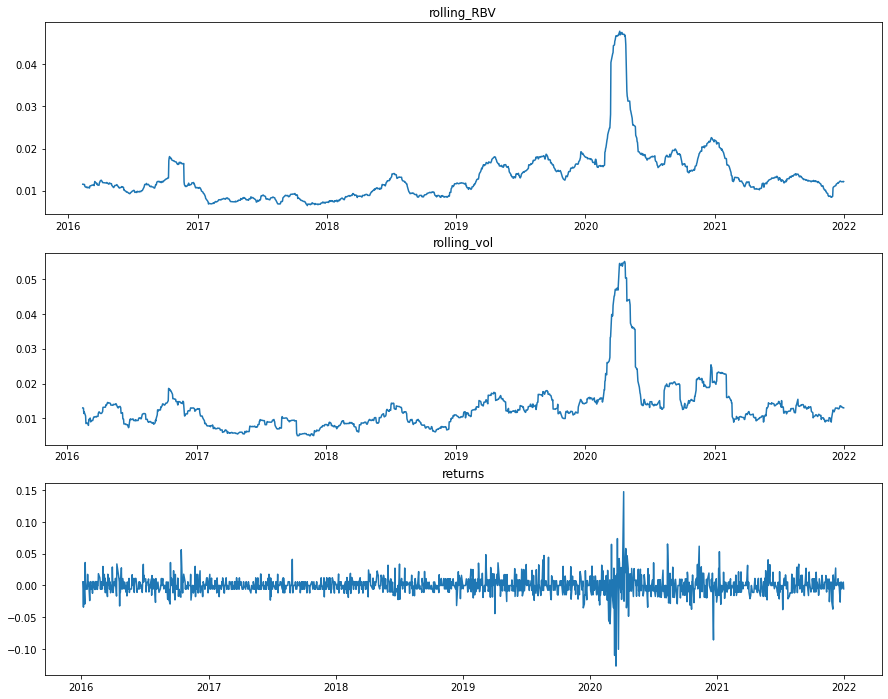

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(3,1,1)
plt.plot(multi_stocks['rolling_RBV'])
plt.title('rolling_RBV')

plt.subplot(3,1,2)
plt.plot(multi_stocks['rolling_vol'])
plt.title('rolling_vol')

plt.subplot(3,1,3)
plt.plot(multi_stocks['returns'])
plt.title('returns')

plt.show()

จากกราฟการเปรียบเทียบระหว่าง rolling volatility เเละ range-based volatility ของ ฺBTS.BK จะเห็นว่าค่ามีความใกล้เคียงกัน โดยวิธี range-based volatility จะมีความต่ำกว่าเล็กน้อย

## TU

In [ ]:
multi_stocks = yf.download("TU.BK", interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True).ffill()
multi_stocks['returns'] = multi_stocks['Close'].pct_change()
multi_stocks['rolling_vol'] = multi_stocks['returns'].rolling(window=30, min_periods=30).std()
multi_stocks['range_based_Vol'] = (0.5*(np.log((multi_stocks['High'] / multi_stocks['Low'])))**2 - (2*np.log(2)-1) * (np.log(multi_stocks['Close'] / multi_stocks['Open']))**2) 
multi_stocks['rolling_RBV'] = multi_stocks['range_based_Vol'].rolling(window=30, min_periods=30).sum()
multi_stocks['rolling_RBV'] = multi_stocks['rolling_RBV'] / 30
multi_stocks['rolling_RBV'] = np.sqrt(multi_stocks['rolling_RBV'])
multi_stocks

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,returns,rolling_vol,range_based_Vol,rolling_RBV
Date,,,,,,,,,
2016-01-04,13.396213,13.396213,12.928903,13.162558,5897200,NaN,NaN,0.000511,NaN
2016-01-05,13.240440,13.318325,12.928900,13.006785,8501600,-0.011834,NaN,0.000318,NaN
2016-01-06,13.084673,13.162558,12.928904,13.084673,5807200,0.005988,NaN,0.000160,NaN
2016-01-07,13.006789,13.318329,12.928904,13.084673,10131900,0.000000,NaN,0.000427,NaN
2016-01-08,13.240443,13.318329,13.084673,13.084673,4748500,0.000000,NaN,0.000103,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-24,18.986841,19.084210,18.792104,18.986841,10631600,0.005155,0.011273,0.000119,0.012945
2021-12-27,18.986842,19.084211,18.792105,18.792105,8868400,-0.010256,0.011340,0.000078,0.012917
2021-12-28,18.792105,18.889474,18.694738,18.792105,19817800,0.000000,0.011280,0.000054,0.012845


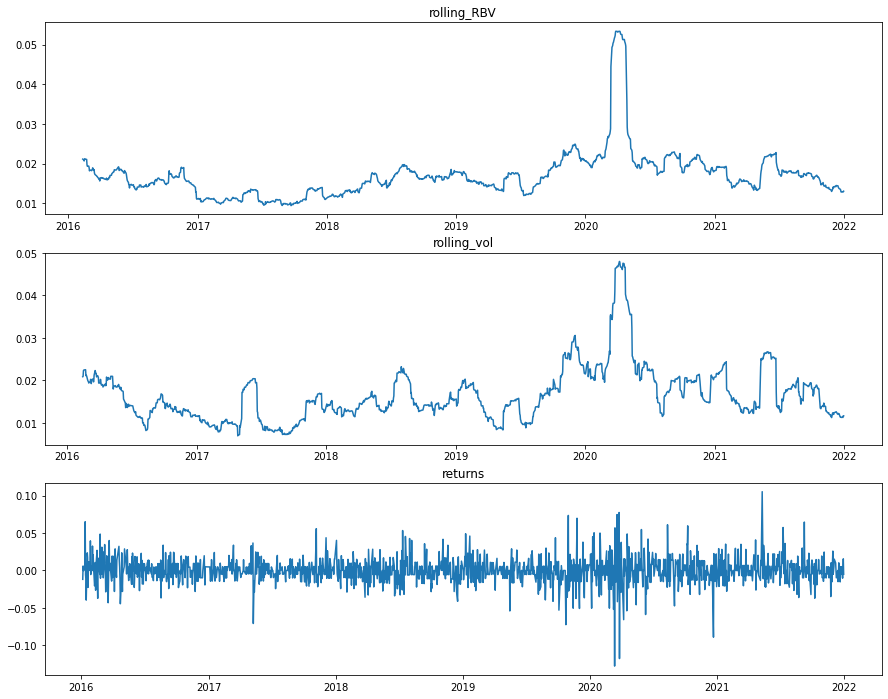

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(3,1,1)
plt.plot(multi_stocks['rolling_RBV'])
plt.title('rolling_RBV')

plt.subplot(3,1,2)
plt.plot(multi_stocks['rolling_vol'])
plt.title('rolling_vol')

plt.subplot(3,1,3)
plt.plot(multi_stocks['returns'])
plt.title('returns')

plt.show()

จากกราฟการเปรียบเทียบระหว่าง rolling volatility เเละ range-based volatility ของ ฺTU.BK จะเห็นว่าค่ามีความใกล้เคียงกัน โดยวิธี range-based volatility จะมีความสูงกว่าเล็กน้อย

# 6.Use the stochastic differential equation model to simulate price and returns

เป็นการจำลอง price เเละ return เพื่อดูเเนวโน้มในอนาคต ดดยจะใช้ stochastic differential equation มาช่วยในการจำลอง โดยสามารถคำนวณได้จากสูตร

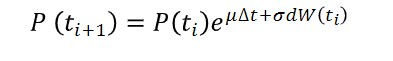



  

*   P(ti+1) = ค่าของ price หรือ return ในอนาคต ณ เวลา i+1
*   P(ti) = ค่าของ price หรือ return ในอนาคต ณ เวลา i


*   mu คือ ค่าเฉลี่ยของ return ในข้อมูลอดีตที่ผ่านมา ณ ช่วงเวลาที่กำหนดไว้

*   ΔT คือ ความเปลี่ยนเเปลงของเวลาต่อหน่วย (วัน)
*   σ คือ ค่า volatility ของ return ในข้อมูลอดีตที่ผ่านมา ณ ช่วงเวลาที่กำหนดไว้


*   dW(ti) คือ ค่า normal distribution ที่เป็นค่า random











##PTTGC

In [ ]:
PTTGC = yf.download("PTTGC.BK", interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True).ffill()
PTTGC = PTTGC[['Close']]
PTTGC['returns'] = PTTGC.pct_change()
PTTGC

[*********************100%***********************]  1 of 1 completed


,Close,returns
Date,,
2016-01-04,37.281487,NaN
2016-01-05,36.908676,-0.010000
2016-01-06,36.722267,-0.005051
2016-01-07,33.926159,-0.076142
2016-01-08,35.044601,0.032967
...,...,...
2021-12-24,56.638638,0.004292
2021-12-27,55.912502,-0.012820
2021-12-28,56.396591,0.008658


In [ ]:
#mean, volatility
mu, sigma = norm.fit(PTTGC['returns'].dropna())
print(mu, sigma)
#time
T = 252
dt = 1
#N
n = int(T/dt)

price = np.zeros(n)
returns = np.zeros(n)

#price
price[0] = PTTGC['Close'][len(PTTGC)-1]

#returns
returns[0] = 1

for i in range(n-1):
  
  noise = np.random.randn()
  #print(noise, price[i], returns[i])
  price[i+1] = price[i] * np.exp(mu*dt + sigma*noise)
  returns[i+1] = returns[i] * np.exp(mu*dt + sigma*noise)


0.0005391580539666384 0.022111097194023398


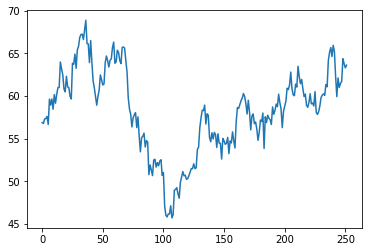

In [ ]:
plt.plot(price)

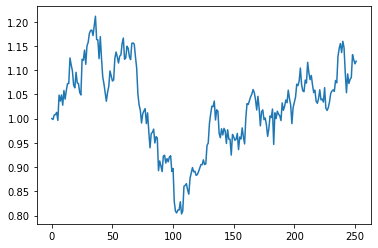

In [ ]:
plt.plot(returns)

## BANPU

In [ ]:
BANPU = yf.download("BANPU.BK", interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True).ffill()
BANPU = BANPU[['Close']]
BANPU['returns'] = BANPU.pct_change()
BANPU

[*********************100%***********************]  1 of 1 completed


,Close,returns
Date,,
2016-01-04,8.956749,NaN
2016-01-05,8.900057,-0.006330
2016-01-06,8.843368,-0.006370
2016-01-07,8.446551,-0.044872
2016-01-08,8.446551,0.000000
...,...,...
2021-12-24,10.365487,0.000000
2021-12-27,10.365487,0.000000
2021-12-28,10.463274,0.009434


In [ ]:
#mean, volatility
mu, sigma = norm.fit(BANPU['returns'].dropna())
print(mu, sigma)
#time
T = 252
dt = 1
#N
n = int(T/dt)

price = np.zeros(n)
returns = np.zeros(n)

#price
price[0] = BANPU['Close'][len(PTTGC)-1]

#returns
returns[0] = 1

for i in range(n-1):
  
  noise = np.random.randn()
  #print(noise, price[i], returns[i])
  price[i+1] = price[i] * np.exp(mu*dt + sigma*noise)
  returns[i+1] = returns[i] * np.exp(mu*dt + sigma*noise)


0.0004732441134942409 0.02720452123495497


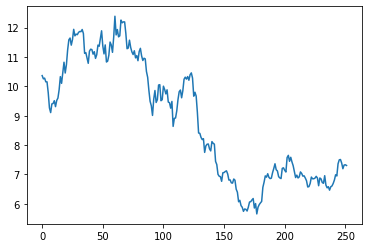

In [ ]:
plt.plot(price)

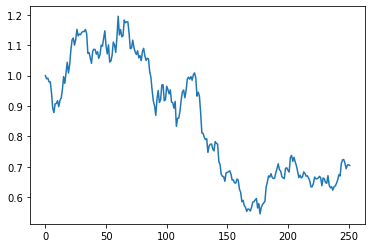

In [ ]:
plt.plot(returns)

## BTS

In [ ]:
BTS = yf.download("BTS.BK", interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True).ffill()
BTS = BTS[['Close']]
BTS['returns'] = BTS.pct_change()
BTS

[*********************100%***********************]  1 of 1 completed


,Close,returns
Date,,
2016-01-04,6.508793,NaN
2016-01-05,6.545774,0.005682
2016-01-06,6.508793,-0.005650
2016-01-07,6.286902,-0.034091
2016-01-08,6.323884,0.005882
...,...,...
2021-12-24,9.030806,-0.005319
2021-12-27,9.030806,0.000000
2021-12-28,9.030806,0.000000


In [ ]:
#mean, volatility
mu, sigma = norm.fit(BTS['returns'].dropna())
print(mu, sigma)
#time
T = 252
dt = 1
#N
n = int(T/dt)

price = np.zeros(n)
returns = np.zeros(n)

#price
price[0] = BTS['Close'][len(PTTGC)-1]

#returns
returns[0] = 1

for i in range(n-1):
  
  noise = np.random.randn()
  #print(noise, price[i], returns[i])
  price[i+1] = price[i] * np.exp(mu*dt + sigma*noise)
  returns[i+1] = returns[i] * np.exp(mu*dt + sigma*noise)

0.00033438262614431656 0.014803641352091718


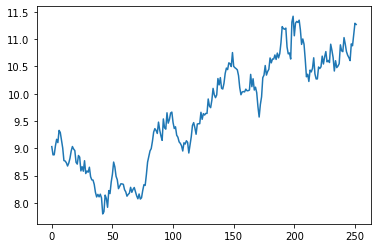

In [ ]:
plt.plot(price)

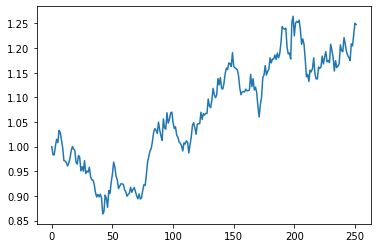

In [ ]:
plt.plot(returns)

## TU

In [ ]:
TU = yf.download("TU.BK", interval='1d', start='2016-01-01', end='2022-01-01', auto_adjust=True).ffill()
TU = TU[['Close']]
TU['returns'] = TU.pct_change()
TU

[*********************100%***********************]  1 of 1 completed


,Close,returns
Date,,
2016-01-04,13.162557,NaN
2016-01-05,13.006789,-0.011834
2016-01-06,13.084672,0.005988
2016-01-07,13.084672,0.000000
2016-01-08,13.084672,0.000000
...,...,...
2021-12-24,18.986841,0.005155
2021-12-27,18.792105,-0.010256
2021-12-28,18.792105,0.000000


In [ ]:
#mean, volatility
mu, sigma = norm.fit(TU['returns'].dropna())
print(mu, sigma)
#time
T = 252
dt = 1
#N
n = int(T/dt)

price = np.zeros(n)
returns = np.zeros(n)

#price
price[0] = TU['Close'][len(PTTGC)-1]

#returns
returns[0] = 1

for i in range(n-1):
  
  noise = np.random.randn()
  #print(noise, price[i], returns[i])
  price[i+1] = price[i] * np.exp(mu*dt + sigma*noise)
  returns[i+1] = returns[i] * np.exp(mu*dt + sigma*noise)

0.00040766782886121866 0.017658883915208194


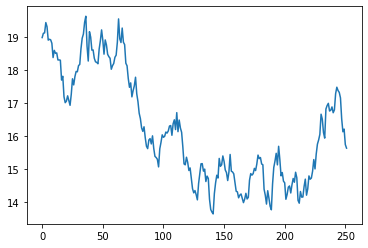

In [ ]:
plt.plot(price)

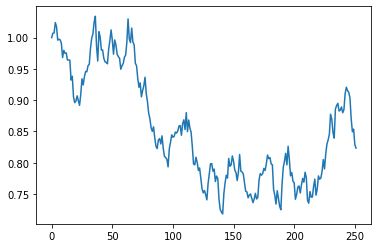

In [ ]:
plt.plot(returns)